<a href="https://colab.research.google.com/github/wujulie/NCHU_basic_emotion/blob/master/load_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(43, 224, 224, 1) (43, 7)
3/3 - 2s
3/3 - 2s - loss: 0.2346 - acc: 0.9767
Confusion matrix, without normalization
[[6 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 5 0 1 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 7 0]
 [0 0 0 0 0 0 9]]
97.67%


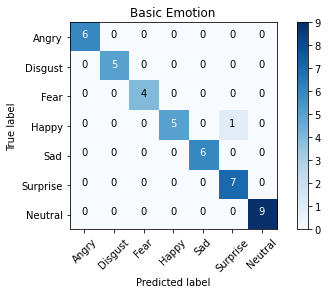

In [1]:
import dlib
import time
import os

from PIL import Image
from keras.layers import Activation
from keras import backend as K
from keras.models import load_model
from keras.utils import plot_model, get_custom_objects, np_utils
import cv2
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import gc
import itertools
import numpy as np
import matplotlib.pyplot as plt
def cal_acc(name, accuracy):
    print("{} Accuracy = {:.2f}% - (+/- {:.2f}%)".format(name, np.mean(accuracy), np.std(accuracy)))

def get_data_from_path(path = 'D:\\NianXiang_File\\CNN\\Dataset\\LE', file_name='BE'):
    # data = np.load('predict_y_nor.npy')
    output = {}
    x = []
    y = []
    folders = []
    for root, dirs, files in os.walk(path, topdown=False):
        for name in dirs:
            folders.append(name)
    folders = folders[-7:]
    start_time = time.time()
    count = 0
    for fld in folders:
        index = folders.index(fld)
        print('Loading {} files (Index: {})'.format(fld, index))
        for root, dirs, files in os.walk(path + '\\' + fld, topdown=False):
            for file in files:
                print(file)
                if (file == '1.jpg'):
                    pass
                else:
                    filepath = root + '\\' + file
                    detector = dlib.get_frontal_face_detector()
                    img = cv2.imread(filepath)
                    face = detector(img, 1)
                    for i, d in enumerate(face):
                        x1 = d.left()
                        y1 = d.top()
                        x2 = d.right()
                        y2 = d.bottom()
                        img = img[y1:y2, x1:x2]
                    lpath = 'D:\\NianXiang_File\\CNN\\Dataset\\small_dataset\\NEW'
                    filename = lpath + '\\' + str(index) + '\\' + str(count) + '.jpg'
                    cv2.imwrite(filename, img)
                    try:
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                        resized = cv2.resize(img, (224, 224), cv2.INTER_LANCZOS4)
                        y.append(index)
                        x.append(resized)
                        count = count + 1
                    except:
                        pass

                # file = Data.static_load_image(ffile)
    np.save('{}_X.npy'.format(file_name), x)
    np.save('{}_Y.npy'.format(file_name), y)
    print("Complete")

def confusion_matri(model=None, normalize=False, title='Confusion Matrix', cls='be', x=None, y=None):
    predict = model.predict(x=x, batch_size=16, verbose=2)
    pred = np.argmax(predict, axis=1)
    loss, score = model.evaluate(x=x, y=y, batch_size=16, verbose=2)

    cnf_matrix = confusion_matrix(np.argmax(y, axis=1), pred)
    np.set_printoptions(precision=2)
    plt.figure()
    if cls == 'be':
        class_name = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    if cls == 'le':
        class_name = ["Frustration", "Confused", "Bored", "Delightful", "Flow", "Surprise"]
    __plot_confusion_matrix(cnf_matrix, classes=class_name,
                            title=title,
                            normalize=normalize)
    print('{:.2f}%'.format(score * 100))
    plt.show()
    # print("Accuracy：{:.2f}%".format(score * 100))

def __plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
if __name__=="__main__":
    def swish(x):
        return K.sigmoid(x) * x


    class Swish(Activation):
        def __init__(self, activation, **kwargs):
            super(Swish, self).__init__(activation, **kwargs)
            self.__name__ = 'swish'
    get_custom_objects().update({"swish": Swish(swish)})
    #
    # path = "D:\\NianXiang_File\\CNN\\Dataset\\mix\\"
    #
    model = load_model('/content/drive/MyDrive/basic_emotion/callbacks.01-0.90909.hdf5')

    # for i in range(7):
    #     x = np.load('C_FRONT_X_{}.npy'.format(i))
    #     # y = np_utils.to_categorical(y, 7).astype('int')
    #     x = x.reshape(x.shape[0], 224, 224, 1)
    #     predict = model.predict(x=x, batch_size=16, verbose=2)
    #     pred = np.argmax(predict, axis=1)
    #     print("{} - {}".format(i, pred))
    #
    #     for index, img in enumerate(x):
    #         single_path = path + "{}".format(pred[index])
    #         if not os.path.exists(single_path):
    #             os.makedirs(single_path)
    #         img = cv2.imwrite(single_path + '\\{}.jpg'.format(index), img)
    # loss, score = model.evaluate(x=x, y=y, batch_size=16, verbose=2)
    # x = np.load('data/Model2_X.npy')
    # x = np.load('DATA_TEST_X.npy')
    # y = np.load('data/Model2_Y.npy')
    # x = np.load('C_FINAL_X.npy')
    # y = np.load('DATA_TEST_Y.npy')
    # print(np.unique(y))
    x = np.load('/content/drive/MyDrive/basic_emotion/JAFFE_test_x.npy')
    y = np.load('/content/drive/MyDrive/basic_emotion/JAFFE_test_y.npy')
    #y = np_utils.to_categorical(y, 7).astype('int')
    x = x.reshape(x.shape[0], 224, 224, 1)
    print(x.shape, y.shape)
    confusion_matri(model=model, normalize=False,
                    title="Basic Emotion",
                    cls='be',x=x,y=y)
    